# Classifying sources detected by the Gaia satellite around the Andromeda galaxy

# Introduction:
Gaia is a revolutionary space observatory develop by European Space Agency and launched in December of 2013 to 1.5 millions of kilometers away from the Earth. The main mission is to provide a three-dimensional map in optical wavelengths to contribute with five unprecedented astronomical parameters: Astrometry, Photometry, and Radial Velocities of more than 1000 millions of sources with accuracies of about 20 micro-arcseconds, in our Galaxy and throughout the Local Group. 
 The instruments hosted in Gaia to accomplish the purpose are: ASTRO (astrometry: positions, parallaxes and proper motions), BP-RP (phothometry: brightness, magnitude and light curves) and Radial Velocity Spectrometer (spectroscopy: spectra, line-of-sight velocities and chemical composition).
 The Andromeda galaxy (also known as M31) is a spiral galaxy located 770 kpc from the Milky Way Galaxy. M31 and the Milky Way galaxies dominate the Local Group, producing 90% of its luminosity, their motion toward each other provides a collision course in approximately 6.3 billions of years.
 The classify of sources detected by the Gaia space observatory around to M31, could be help to exploring the neighborhood of Andromeda galaxy and give clues about his galactic archaeology in previous studies, i.e., The Panoramic Andromeda Archaeological Survey.

# Python packages used
All began importing the follow packages described in blue, the Python packages used were:

In [2]:
from glob import glob  # Finds all the pathnames matching a specified pattern according to rules of Unix shell.

import numpy as np                                                              # Used for working with arrays.
import matplotlib.pyplot as plt       # Mainly intended for interactive plots and programmatic plot generation.
import seaborn as sns       # Provides a interface for drawing attractive and informative statistical graphics.

from astropy.io import fits                  # Provides access to FITS files (Flexible Image Transport System).
from astropy.io import ascii       # Provides methods for reading and writing a wide range of ASCII data table.
from astropy.table import Table     # Provides functionality for storing and manipulating heterogeneous tables.
import pandas as pd             # Powerful and flexible to use open source data analysis and manipulation tool.

from photutils.isophote import EllipseGeometry  # Provides tools to fit elliptical isophotes to a galaxy image.
from photutils.isophote import Ellipse                   # Class to fit elliptical isophotes to a galaxy image.
from photutils.isophote import build_ellipse_model         # Build a model elliptical from a list of isophotes.

# Displaying data .fits
The glob module was used to finds all the path-names matching a specified pattern and keeping in a variable called "data". At the same time were showed in a plot all data with his corresponding name in the title.

<ipython-input-38-06469ca397b5>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1) = plt.subplots(figsize=(2, 2))


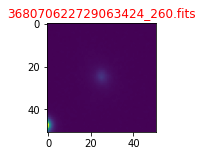

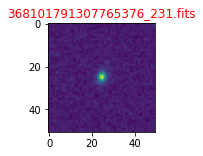

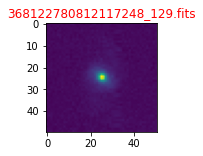

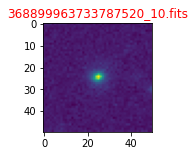

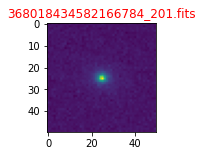

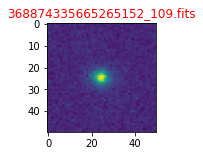

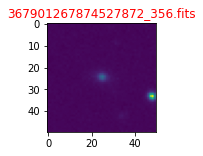

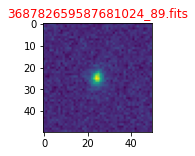

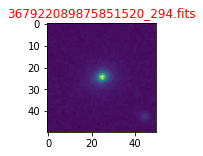

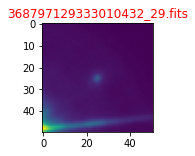

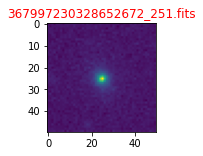

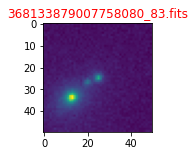

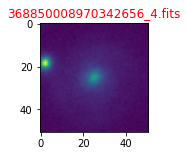

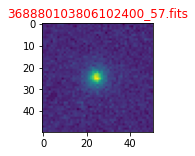

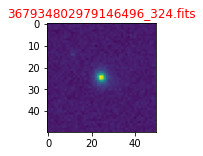

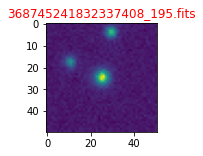

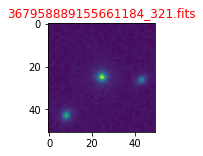

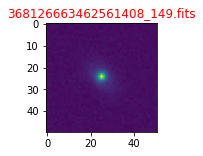

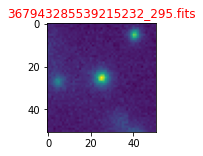

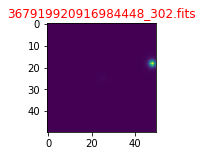

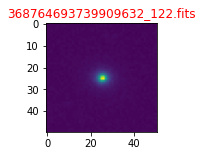

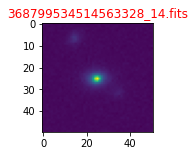

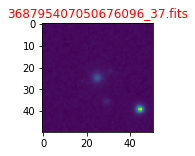

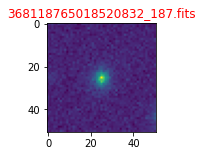

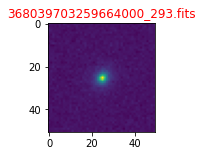

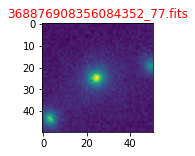

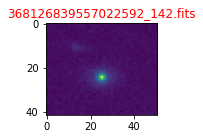

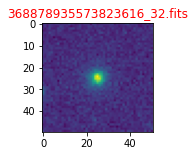

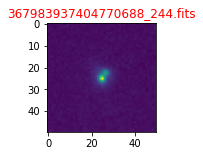

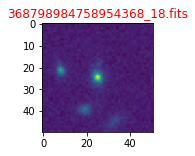

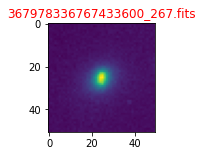

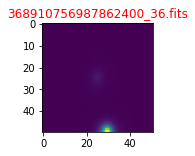

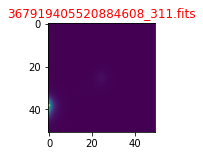

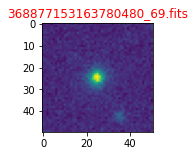

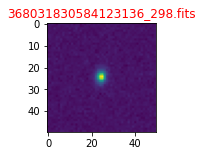

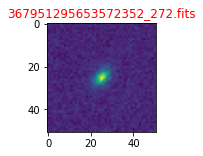

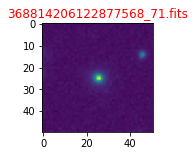

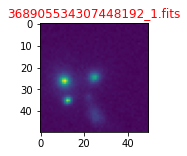

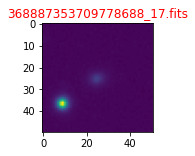

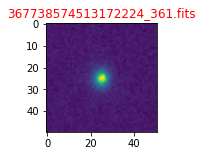

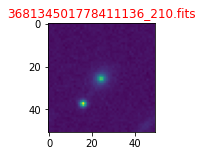

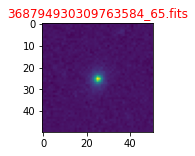

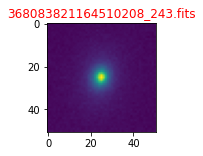

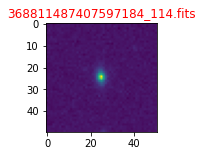

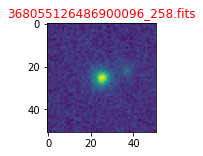

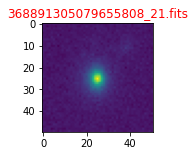

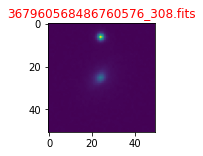

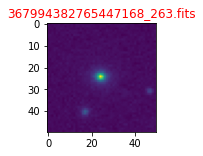

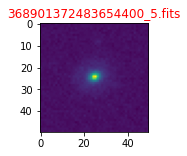

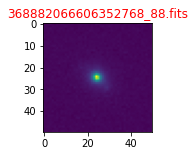

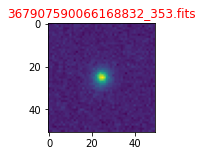

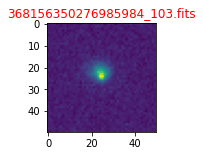

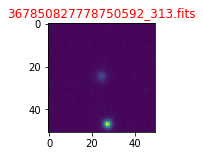

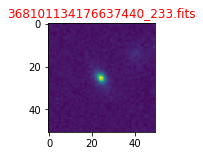

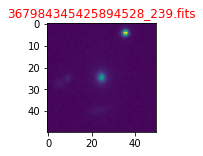

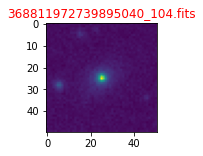

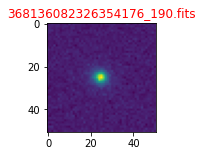

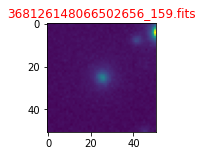

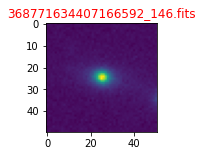

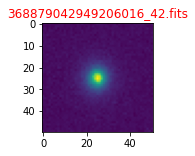

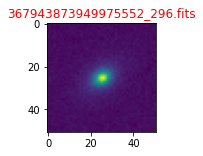

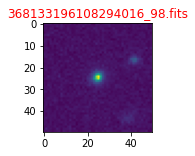

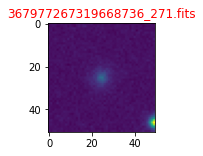

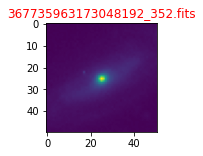

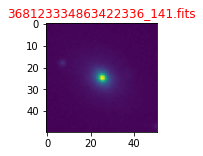

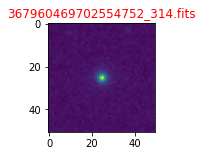

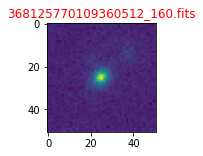

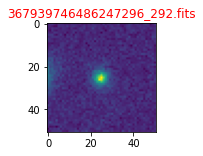

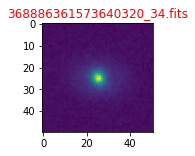

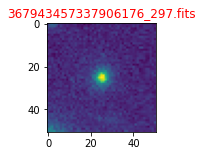

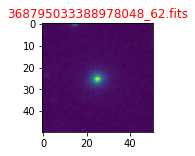

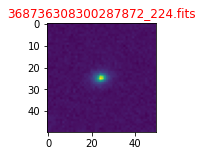

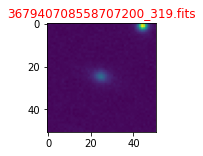

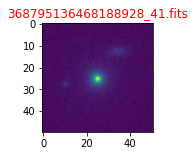

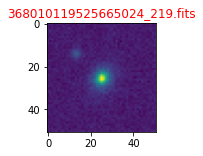

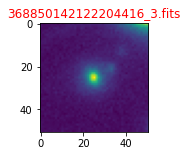

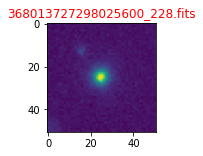

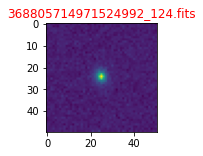

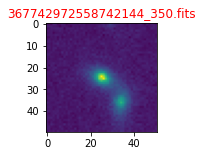

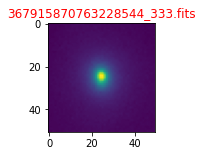

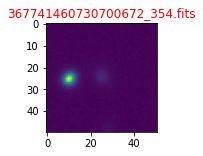

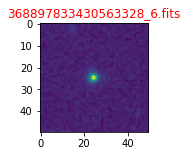

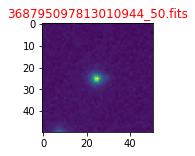

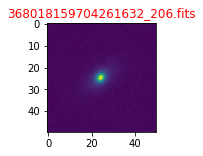

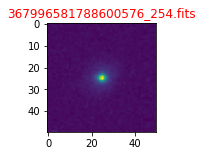

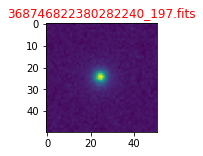

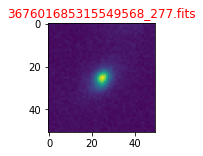

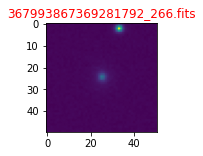

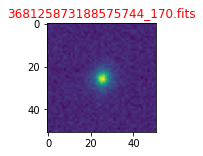

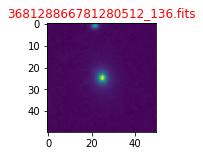

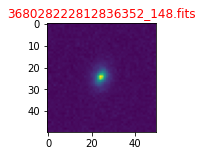

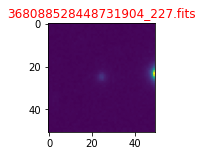

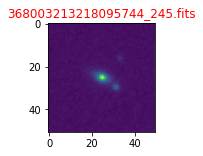

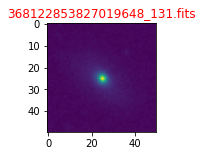

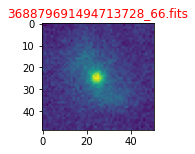

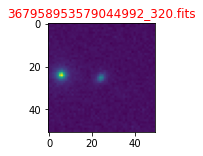

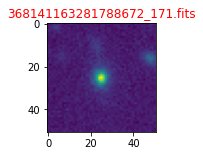

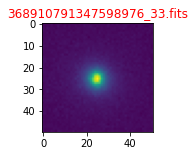

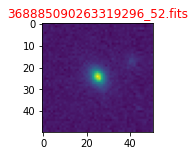

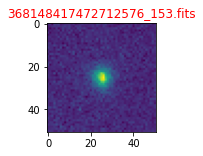

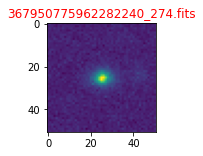

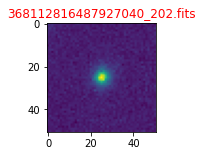

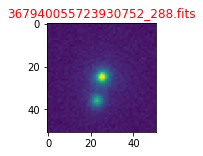

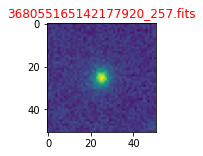

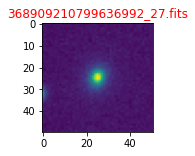

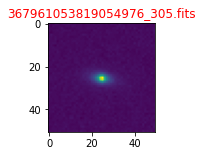

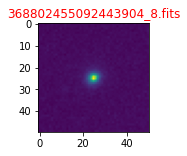

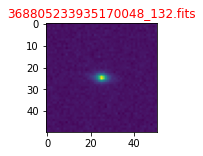

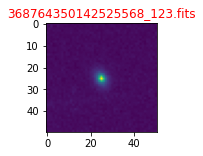

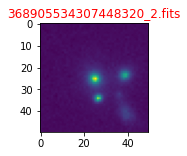

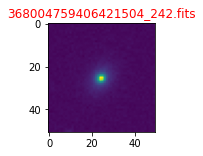

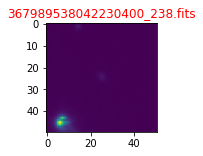

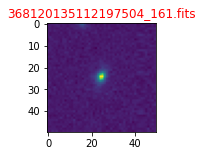

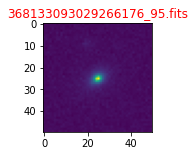

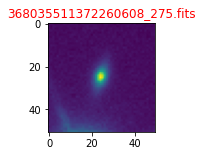

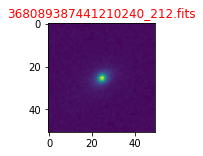

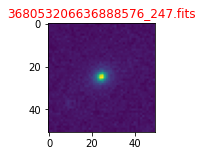

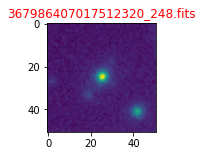

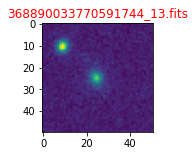

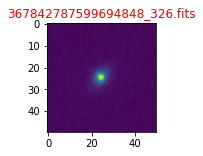

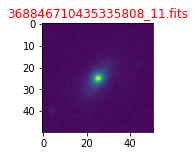

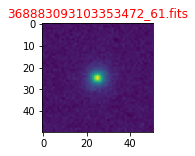

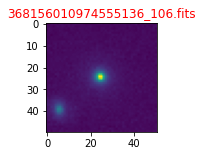

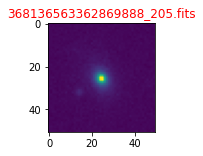

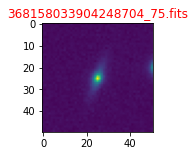

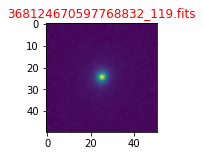

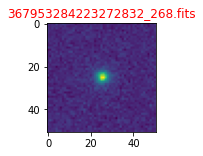

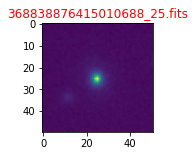

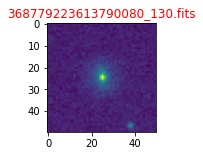

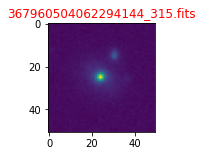

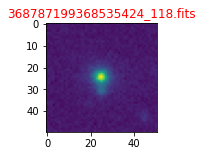

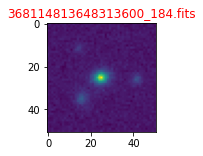

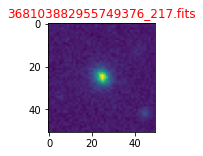

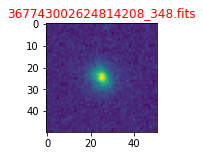

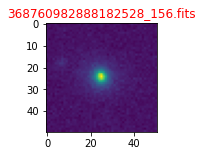

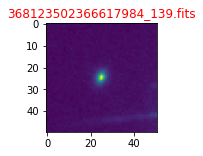

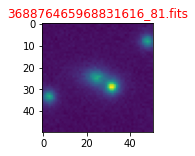

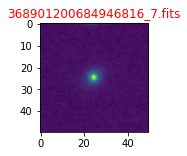

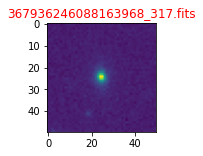

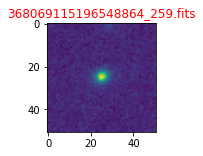

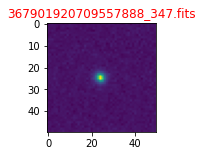

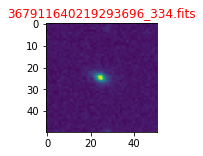

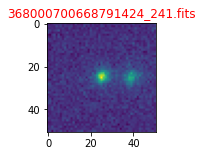

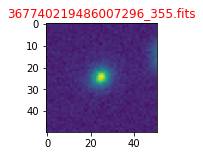

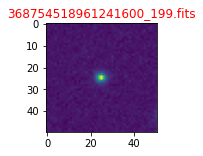

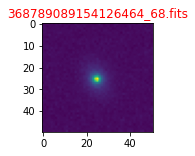

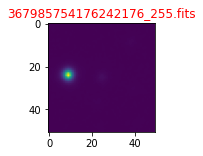

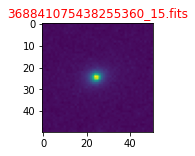

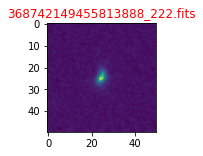

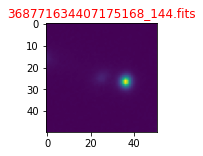

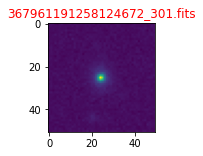

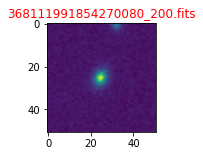

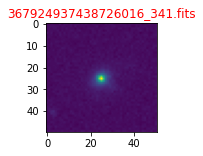

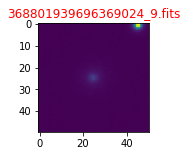

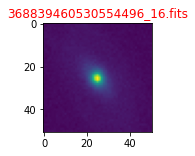

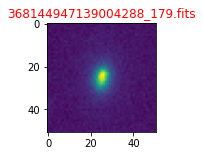

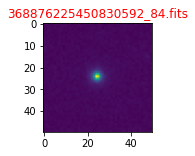

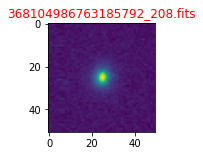

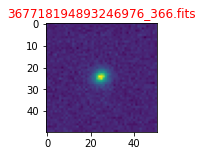

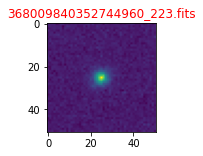

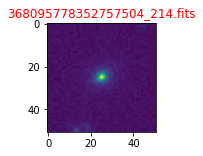

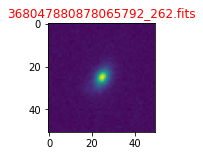

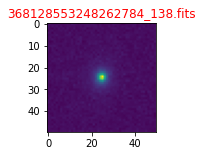

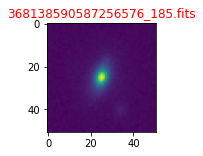

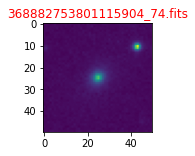

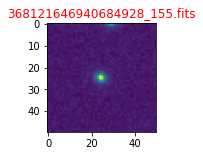

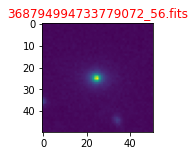

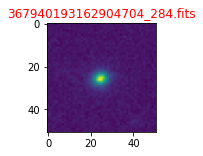

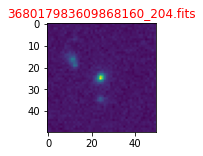

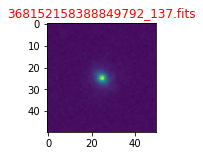

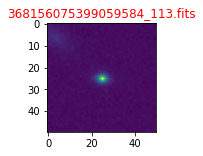

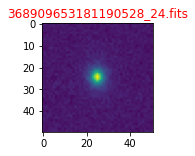

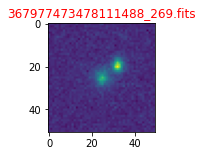

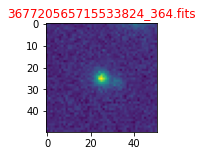

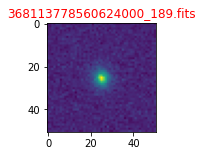

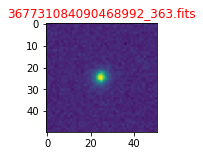

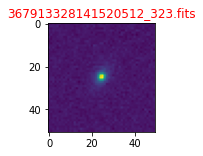

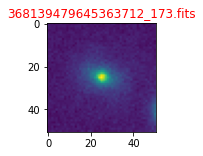

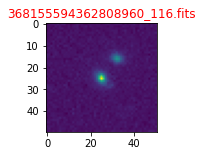

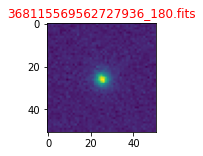

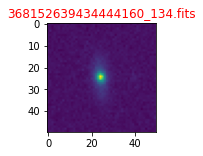

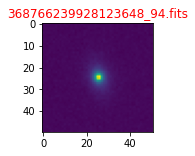

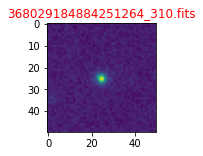

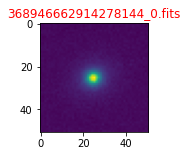

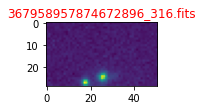

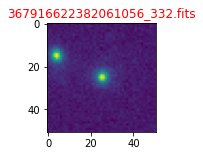

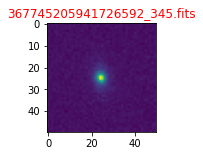

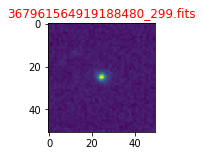

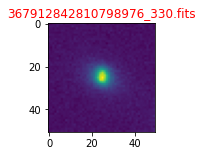

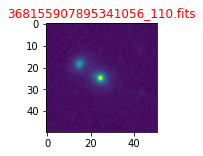

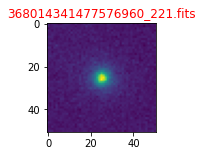

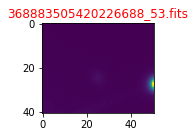

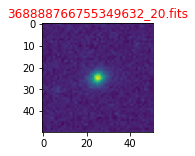

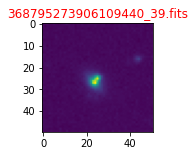

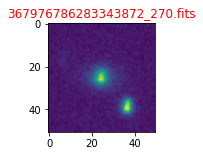

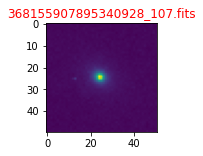

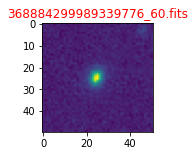

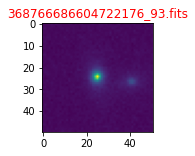

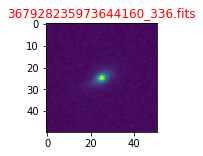

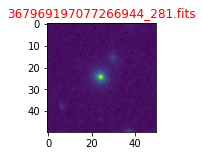

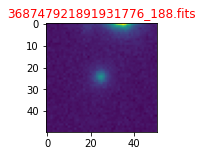

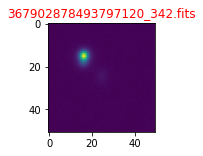

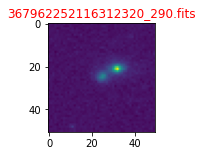

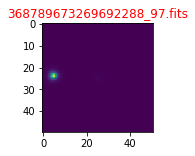

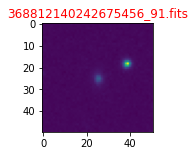

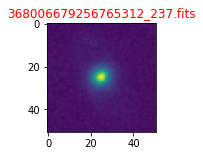

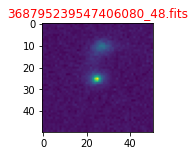

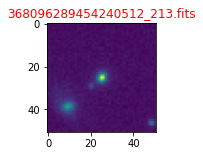

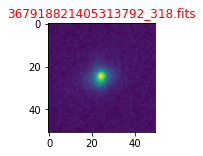

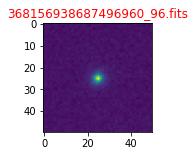

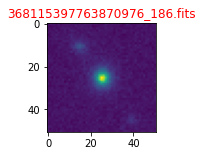

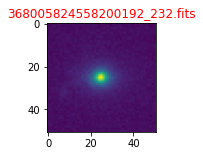

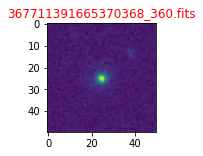

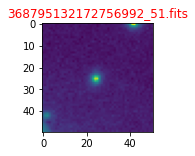

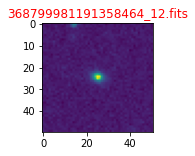

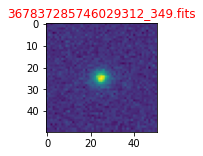

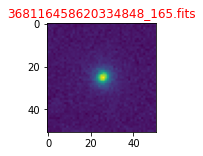

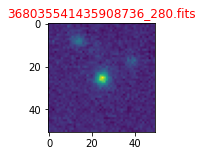

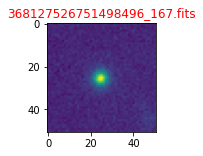

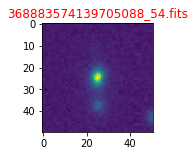

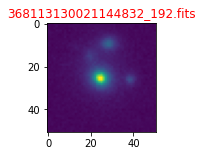

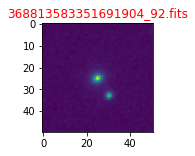

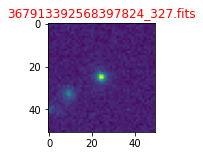

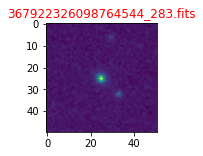

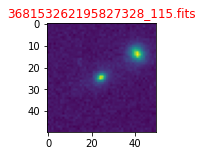

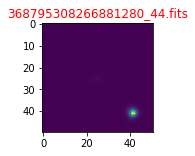

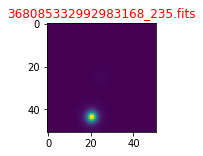

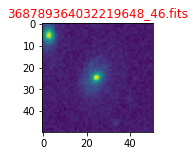

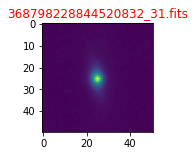

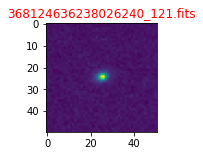

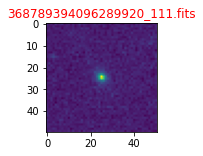

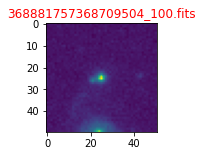

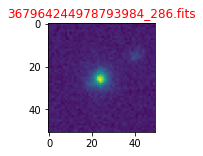

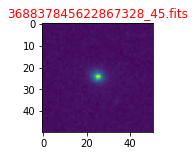

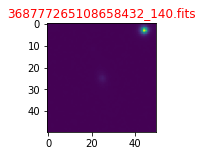

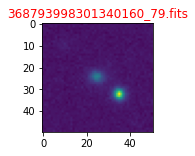

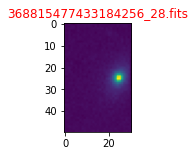

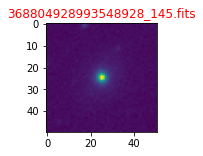

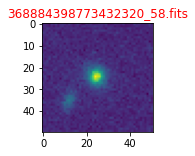

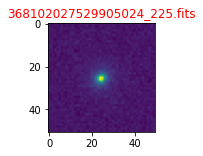

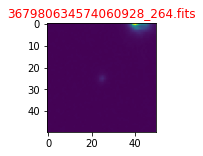

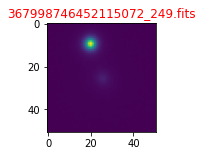

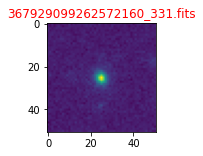

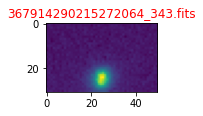

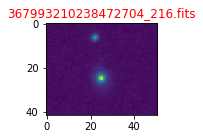

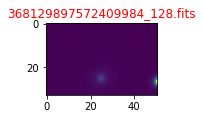

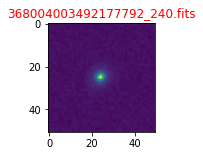

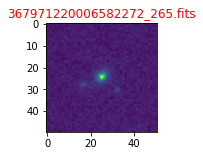

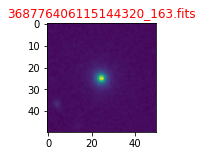

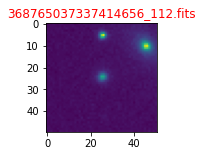

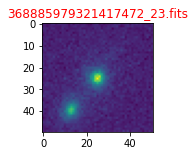

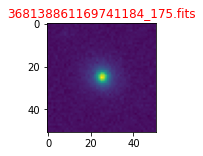

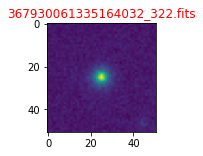

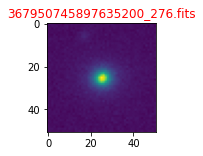

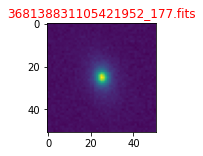

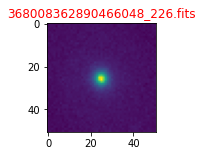

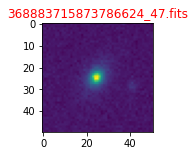

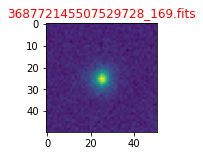

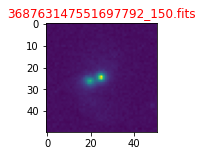

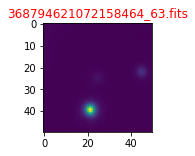

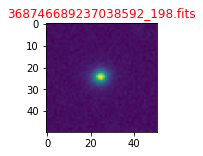

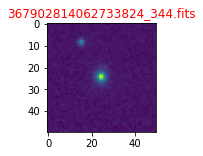

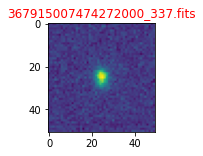

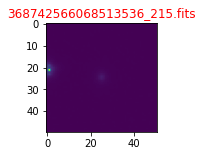

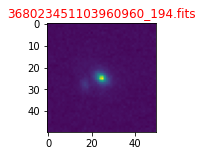

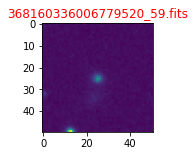

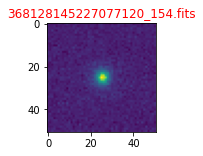

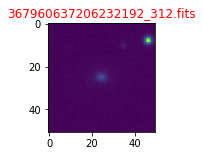

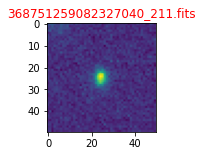

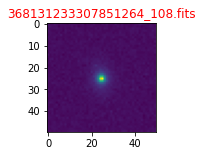

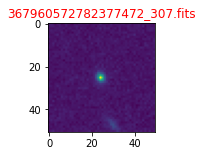

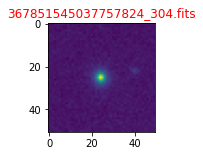

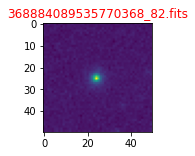

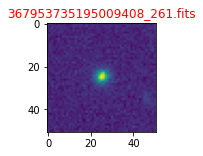

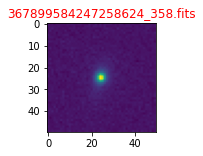

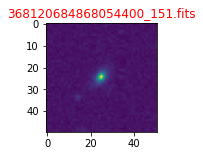

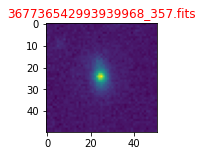

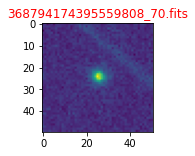

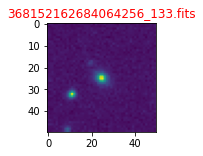

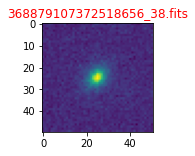

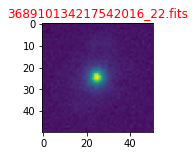

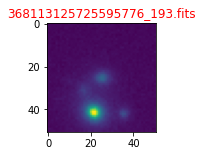

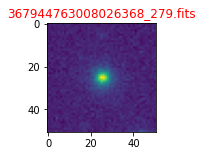

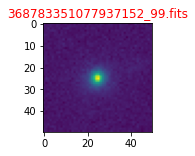

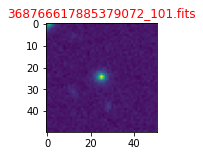

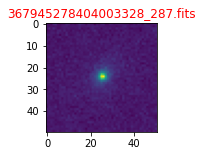

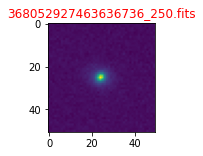

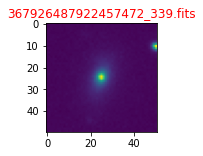

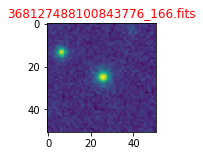

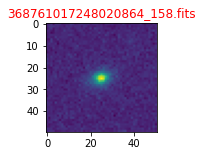

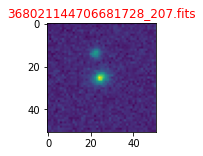

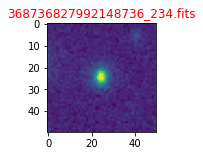

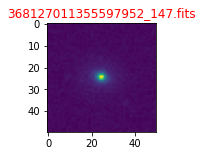

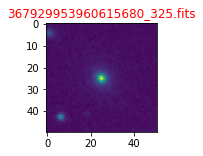

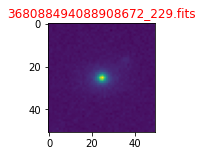

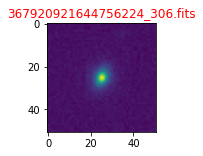

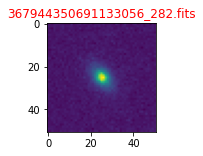

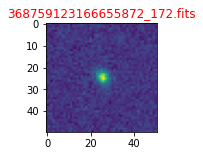

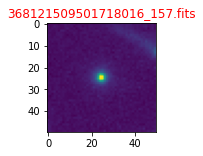

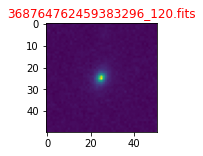

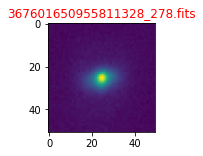

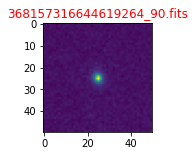

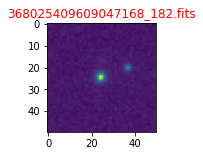

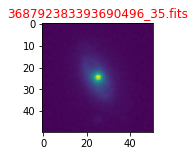

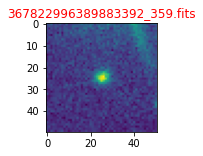

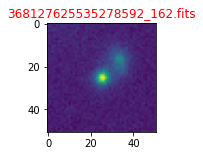

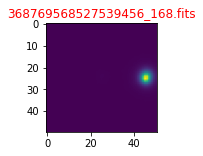

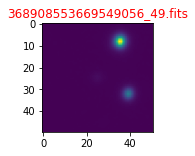

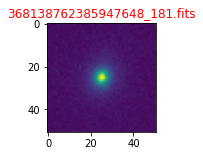

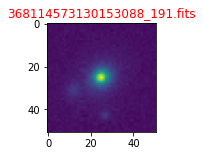

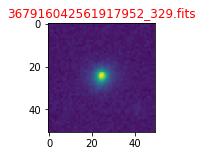

In [38]:
data = glob("*.fits")
for i in data:
    with fits.open(i) as hdu:
        data = hdu[0].data
        fig, (ax1) = plt.subplots(figsize=(2, 2))  
        ax1.imshow(data)            
        ax1.set_title(f'{i}', c='Red')
        hdu.close()

# Aims
The objective of the project is to classify objects (as foreground stars and stellar clusters, background galaxies) in many broad band images observed in the region of the Andromeda galaxy (M31). The program run using all SDSS images, and a new selection of Gaia detection objects. The given list of coordinates of the objects are given by the Gaia satellite (data release number 3) in the vicinity of M31. First, the student will use the Python code developed by the professor Médéric Boquien to find objects in the SDSS images and generate mini-images (one image per object). Then, the student will develop a code that fits an isophotal ellipse model to each object/mini image and classify if the object is a background galaxy or a foreground star/stellar cluster. A catalogue of objects will then be made.


# Methods
a) The ellipse geometry was defined with the EllipseGeometry class. For each of these objects, the model was fitted at fixed center coordinates (x-y), thus the pixels x-y of the mini images corresponding to the RA-DEC of the Gaia sources, and was defined an initial ellipse whose position angle is determined in radians. To perform the elliptical isophote fit, was run the fit_image() method. The result is a list of isophotes as an IsophoteList object, whose attributes are the fit values for each isophote sorted by the semi-major axis length. 
Finally all isophotes lists were saved in ASCII files with the resulting table of the ellipse fitting. Where: x0 and y0 = center position, sma = semi-major axis length in pixels and eps = ellipticity.

b) Then, where plotted the ellipticity, position angle, and the center x and y position as a function of the semi-major axis length for each target.

c) Was interpolate the output of the ellipse fitting task with a new vector that is regularly (linearly) spaced. The interpolation is necessary because the output SMA of ellipse task is logarithmic. The logarithmic spacing biases the median (or mean) ellipticity because it produces more points in the inner part of each object (which are more circular). Therefore, the interpolated profile is needed, and gives an ellipticity more representative of the whole distribution of light (inner and outer parts of the objects).

d) The part of the Code with the variable meme shows that the lists based on the median and mean of the position angle and ellipticity (green and orange horizontal bars in the previous plots) were created in ASCII format.

e) So, were plot the original data over-plotted with some of the isophotes (at left), the elliptical model image (at center), and the residual image (at right). All saved in PDF files with his correspond name.

In [15]:
class U:                                  
    def __init__(self, name, sma, eps): 
        self._name = name
        self._sma = sma
        self._eps = eps

    def table(self):
        hdu = fits.open(self._name) 
        data = hdu[0].data
        hdu.close()
        geometry = EllipseGeometry(x0=25, y0=25, sma=self._sma, eps=self._eps, pa=np.radians(100)) 
        ellipse = Ellipse(data, geometry)
        isolist = ellipse.fit_image(sclip=2., nclip=3)
        tab = isolist.to_table()
        ascii.write(tab, f'{self._name}_table.ascii', overwrite=True) 
        
        minr = np.min(isolist.sma)
        maxr = np.max(isolist.sma)
        radinterp = np.linspace(minr, maxr, 10)
        epsinterp = np.interp(radinterp, isolist.sma, isolist.eps)
        painterp = np.interp(radinterp, isolist.sma, isolist.pa)
        
        plt.figure(figsize=(12, 7))
        plt.figure(1)
        plt.subplot(221)
        plt.title(self._name, c='Red')
        plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err, fmt='.', markersize=4)
        elip_median = [np.median(epsinterp)]*len(epsinterp)
        plt.errorbar(radinterp, elip_median, linestyle='-', label='median')
        elip_mean = [np.mean(epsinterp)]*len(epsinterp)
        plt.errorbar(radinterp, elip_mean, linestyle='--', label='mean')
        plt.xlabel('Semimajor axis length [pixels]', c='Blue')
        plt.ylabel('Ellipticity', c='Blue')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.subplot(222)
        plt.title(self._name, c='Red')
        plt.errorbar(isolist.sma, isolist.pa/np.pi*180., yerr=isolist.pa_err/np.pi* 80., fmt='.', markersize=4)
        pa_median = [np.median(painterp/np.pi*180.)]*len(painterp)
        plt.errorbar(radinterp, pa_median, linestyle='-')
        pa_mean = [np.mean(painterp/np.pi*180.)]*len(painterp)
        plt.errorbar(radinterp, pa_mean, linestyle='--')
        plt.xlabel('Semimajor axis length [pixels]', c='Blue')
        plt.ylabel('PA [degrees]', c='Blue')
        plt.subplot(223)
        plt.title(self._name, c='Red')
        plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='.', markersize=4)
        y_median = [np.median(isolist.x0)]*len(isolist.sma)
        plt.errorbar(isolist.sma, y_median, linestyle='-', label='median')
        y_mean = [np.mean(isolist.x0)]*len(isolist.sma)
        plt.errorbar(isolist.sma, y_mean, linestyle='--', label='mean')
        plt.xlabel('Semimajor axis length [pixels]', c='Blue')
        plt.ylabel('X0', c='Blue')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
        plt.subplot(224)
        plt.title(self._name, c='Red')
        plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='.', markersize=4)
        y_median = [np.median(isolist.y0)]*len(isolist.sma)
        plt.errorbar(isolist.sma, y_median, linestyle='-')
        y_mean = [np.mean(isolist.y0)]*len(isolist.sma)
        plt.errorbar(isolist.sma, y_mean, linestyle='--')
        plt.xlabel('Semimajor axis length [pixels]', c='Blue')
        plt.ylabel('Y0', c='Blue')
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
        plt.savefig(f'{self._name}_plot.pdf')
        plt.close()
        
        meme = np.array([i, np.max(elip_median), np.max(pa_median), np.max(elip_mean), np.max(pa_mean)])
        ascii.write(meme, f'{self._name}_medmea.ascii', 
                    names=['name','ellipticity_median','position_angle_median','ellipticity_mean','position_angle_mean'],
                    overwrite=True) 

        model_image = build_ellipse_model(data.shape, isolist)
        residual = data - model_image
                
        fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 10), nrows=1, ncols=3)
        fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
        ax1.imshow(data, origin='lower')
        ax1.set_title(self._name, c='Blue')
        smas = np.linspace(2, 10, 5)
        for sma in smas:
            iso = isolist.get_closest(sma)
            x, y, = iso.sampled_coordinates()
            ax1.plot(x, y, color='white')
            ax2.imshow(model_image, origin='lower')
            ax2.set_title('Ellipse Model', c='Blue')
            ax3.imshow(residual, origin='lower')
            ax3.set_title('Residual', c='Blue')
            plt.savefig(f'{self._name}_model.pdf')
        plt.close()

To carry out the purpose of the code previously mentioned for many targets at the same time it was found that the values fitted to the more number of sources were 3.5 for the semi-major axis length and 0.15 for the ellipticity, after several attempts with different initial values.

In [16]:
data = glob("*.fits")
for i in data:
    imagen = U(i, 3.5, 0.15)
    imagen.table()

# For only case
The code could be used also for a single target with different initial parameters. For example a  more elongated, brighter or fainter source.

In [53]:
imagen = U("367709501879732864_362.fits",5, 0.3)
print(imagen.table())

None


# Plots and conclusions
Finally, each list created for each target (described in the point 5) was concatenate in a big list (called final_ellipse) to perform different type of plots and obtain conclusions that allow a discuss. 

In [3]:
df = pd.read_csv("final_ellipse.csv")  
df

name  ellipticity_median  position_angle_median  \
0    367601650955811328_278.fits             0.212139             123.947770   
1    367601685315549568_277.fits             0.443984             128.309439   
2    367711391665370368_360.fits             0.114082             112.978210   
3    367718194893246976_366.fits             0.077819             138.666411   
4    367720565715533824_364.fits             0.141097              38.012477   
..                            ...                 ...                    ...   
306    368909653181190528_24.fits            0.213876              80.240873   
307    368910134217542016_22.fits            0.102155             116.431237   
308    368910756987862400_36.fits            0.348788              93.211705   
309    368910791347598976_33.fits            0.114453              21.113290   
310     368946662914278144_0.fits            0.159367             155.592431   

     ellipticity_mean  position_angle_mean  
0            0.213808           125.178677  
1            0.463476           117.853702  
2            0.116937            92.579192  
3            0.102947           129.367102  
4            0.120442            41.830098  
..                ...                  ...  
306          0.197007            73.241676  
307          0.127215           107.268362  
308          0.326749            83.536752  
309          0.107127            29.198168  
310          0.154222           140.405374  

[311 rows x 5 columns]

The following code allows to carry out the following plots that shows  Position Angle v/s Ellipticity (at left based on median, at right based on mean). Each red point represent a source and the blue line in the center correspond to the percentile 50 (the percentile could be easy  changed in the code).

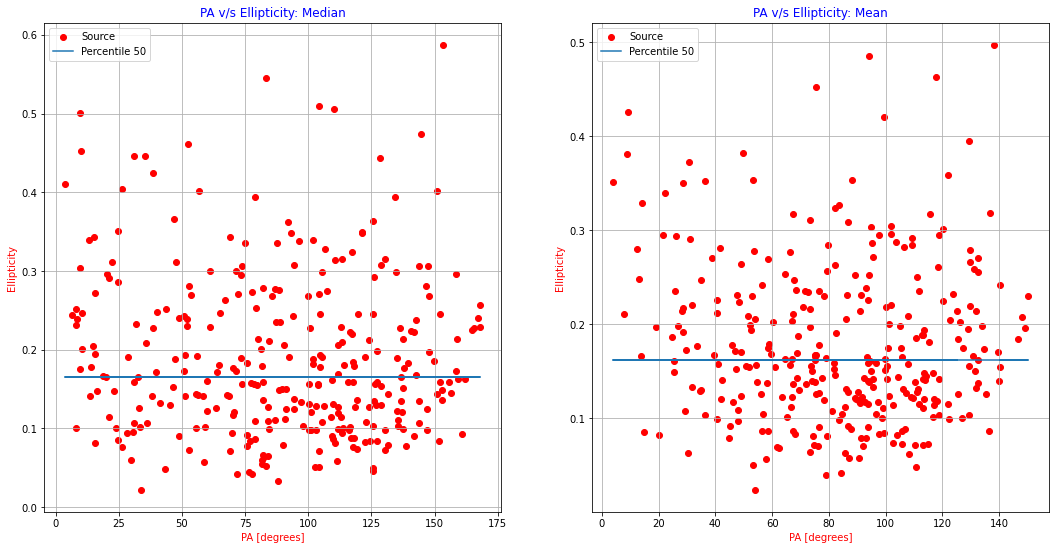

In [5]:
fig, (axa, axb) = plt.subplots(1, 2, figsize=(18,9))

axa.scatter(df.position_angle_median, df.ellipticity_median, c='red', label="Source")
y_mean = [np.percentile(df.ellipticity_median,50)]*len(df.position_angle_median)
axa.errorbar(df.position_angle_median, y_mean, linestyle='-', label="Percentile 50")
axa.set_xlabel('PA [degrees]', c='red')
axa.set_ylabel('Ellipticity', c='red')
axa.set_title('PA v/s Ellipticity: Median', c='Blue')
axa.grid(True)
axa.legend(loc='upper left')

axb.scatter(df.position_angle_mean, df.ellipticity_mean, c='red', label="Source")
ymean = [np.percentile(df.ellipticity_mean,50)]*len(df.position_angle_mean)
axb.errorbar(df.position_angle_mean, ymean, linestyle='-', label="Percentile 50")
axb.set_xlabel('PA [degrees]', c='red')
axb.set_ylabel('Ellipticity', c='red')
axb.set_title('PA v/s Ellipticity: Mean', c='blue')
axb.grid(True)
axb.legend(loc='upper left')
plt.savefig('PA_Ellipticity_plots.png')
plt.show()
plt.close()

In [17]:
print("median_50", np.percentile(df.ellipticity_median,50)) 
print("mean_50", np.percentile(df.ellipticity_mean,50))

median_50 0.16545226508010624
mean_50 0.16177312148591744


# PA v/s Ellipticity: Median

155 sources were select


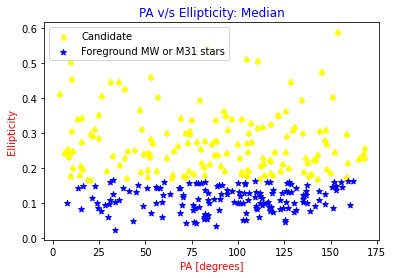

In [22]:
hola= df[(df["ellipticity_median"]>0.16545226508010624)]
chao= df[(df["ellipticity_median"]<0.16545226508010624)]
print(len(hola),'sources were select')

plt.scatter(hola["position_angle_median"], hola["ellipticity_median"], 
            marker=r'$\clubsuit$', c="yellow", label="Candidate")
plt.scatter(chao["position_angle_median"], chao["ellipticity_median"], 
            marker="*", c="blue", label="Foreground MW or M31 stars")
plt.title('PA v/s Ellipticity: Median', c='blue')
plt.xlabel('PA [degrees]',c='red')
plt.ylabel('Ellipticity', c='red')
plt.legend(loc='upper left')
plt.savefig('PA_Ellipticity_median.png')

# PA v/s Ellipticity: Mean

155 sources were select


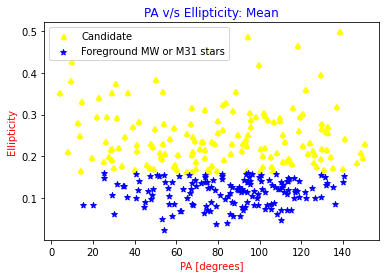

In [23]:
hi= df[(df["ellipticity_mean"]>0.16177312148591744)]
bye= df[(df["ellipticity_mean"]<0.16177312148591744)]
print(len(hi),'sources were select')

plt.scatter(hi["position_angle_mean"], hi["ellipticity_mean"], 
            marker=r'$\clubsuit$', c="yellow", label="Candidate")
plt.scatter(bye["position_angle_mean"], bye["ellipticity_mean"], 
            marker="*", c="blue", label="Foreground MW or M31 stars")
plt.title('PA v/s Ellipticity: Mean', c='Blue')
plt.xlabel('PA [degrees]',c='red')
plt.ylabel('Ellipticity', c='red')
plt.legend(loc='upper left')
plt.savefig('PA_Ellipticity_mean.png')

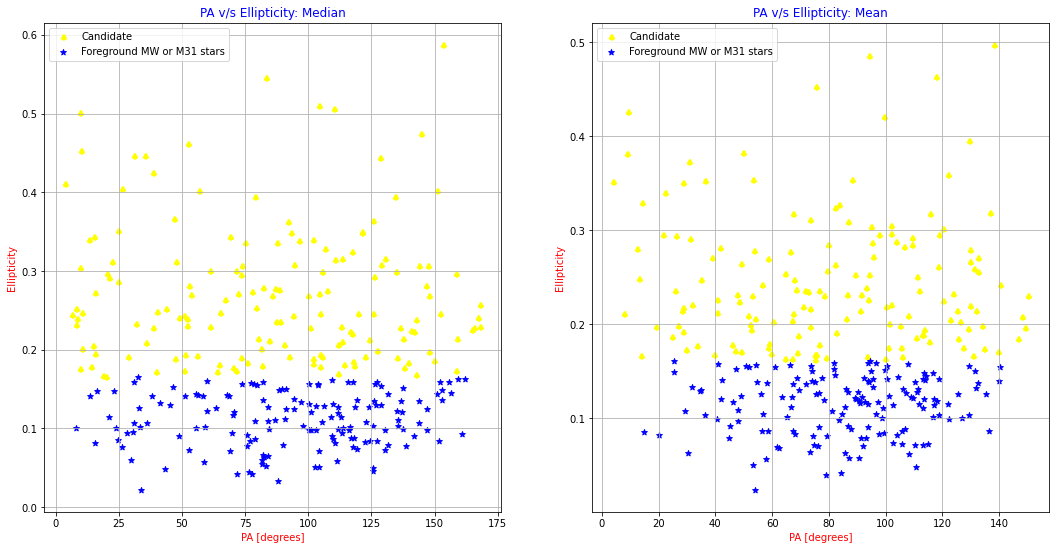

In [24]:
fig, (axa, axb) = plt.subplots(1, 2, figsize=(18,9))

axa.scatter(hola["position_angle_median"], hola["ellipticity_median"], 
            marker=r'$\clubsuit$', c="yellow", label="Candidate")
axa.scatter(chao["position_angle_median"], chao["ellipticity_median"], 
            marker='*', c="blue", label="Foreground MW or M31 stars")
axa.set_xlabel('PA [degrees]', c='red')
axa.set_ylabel('Ellipticity', c='red')
axa.set_title('PA v/s Ellipticity: Median', c='blue')
axa.grid(True)
axa.legend(loc='upper left')

axb.scatter(hi["position_angle_mean"], hi["ellipticity_mean"], 
            marker=r'$\clubsuit$', c="yellow", label="Candidate")
axb.scatter(bye["position_angle_mean"], bye["ellipticity_mean"], 
            marker='*', c="blue", label="Foreground MW or M31 stars")
axb.set_xlabel('PA [degrees]', c='red')
axb.set_ylabel('Ellipticity', c='red')
axb.set_title('PA v/s Ellipticity: Mean', c='blue')
axb.grid(True)
axb.legend(loc='upper left')

plt.savefig('PA_Ellipticity_select.png')
plt.show()
plt.close()

# Statistics

In [35]:
df[(df["ellipticity_median"]>0.16545226508010624)&(df["ellipticity_mean"]>0.16177312148591744)]

name  ellipticity_median  position_angle_median  \
0    367601650955811328_278.fits             0.212139             123.947770   
1    367601685315549568_277.fits             0.443984             128.309439   
6    367735963173048192_352.fits             0.587311             153.397210   
7    367736542993939968_357.fits             0.394303              78.966164   
11   367742972558742144_350.fits             0.446254              30.978787   
..                            ...                 ...                    ...   
297    368891305079655808_21.fits            0.205487              90.251956   
301     368901372483654400_5.fits            0.213885             158.875781   
304    368908553669549056_49.fits            0.190591              92.484964   
306    368909653181190528_24.fits            0.213876              80.240873   
308    368910756987862400_36.fits            0.348788              93.211705   

     ellipticity_mean  position_angle_mean  
0            0.213808           125.178677  
1            0.463476           117.853702  
6            0.497384           138.183136  
7            0.310964            73.354079  
11           0.372251            30.691339  
..                ...                  ...  
297          0.191027            82.357827  
301          0.214411           131.926649  
304          0.252034            89.117548  
306          0.197007            73.241676  
308          0.326749            83.536752  

[144 rows x 5 columns]

In [36]:
df[(df["ellipticity_median"]<0.16545226508010624)&(df["ellipticity_mean"]<0.16177312148591744)]

name  ellipticity_median  position_angle_median  \
2    367711391665370368_360.fits             0.114082             112.978210   
3    367718194893246976_366.fits             0.077819             138.666411   
4    367720565715533824_364.fits             0.141097              38.012477   
5    367731084090468992_363.fits             0.094860             113.253752   
8    367738574513172224_361.fits             0.125277              91.023325   
..                            ...                 ...                    ...   
298     368897833430563328_6.fits            0.066805              82.188574   
303     368905534307448320_2.fits            0.121912              59.813261   
307    368910134217542016_22.fits            0.102155             116.431237   
309    368910791347598976_33.fits            0.114453              21.113290   
310     368946662914278144_0.fits            0.159367             155.592431   

     ellipticity_mean  position_angle_mean  
2            0.116937            92.579192  
3            0.102947           129.367102  
4            0.120442            41.830098  
5            0.082473           103.819905  
8            0.112111            85.613016  
..                ...                  ...  
298          0.080867            74.242182  
303          0.123104            49.016410  
307          0.127215           107.268362  
309          0.107127            29.198168  
310          0.154222           140.405374  

[143 rows x 5 columns]